In [161]:
from pygraphml import GraphMLParser

from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib.ticker import MaxNLocator

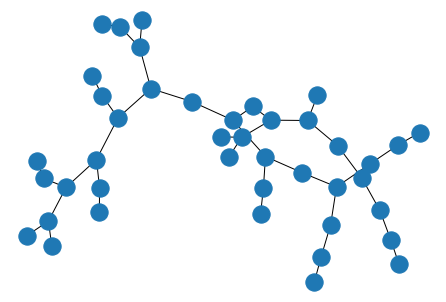

In [139]:
file_list = ["tree1.xml", "tree2.xml", "tree3.xml", "tree4.xml",]
graphs = [GraphMLParser().parse("data/" + file_name) for file_name in file_list]
graphs[0].show()

In [77]:
def LayeredTreeDraw(graph):
    counter = 0

    def visit(node, d):
        def mark(node):
            nonlocal counter
            node.x = counter
            node.y = d
            counter += 1

        children = node.children()

        if len(children) == 2:
            visit(children[0], d+1)
            mark(node)    
            visit(children[1], d+1)
        elif len(children) == 1:
            visit(children[0], d+1)
            mark(node)
        else:
            mark(node)

    visit(graph.nodes()[0], 0)

In [168]:
def draw_graph(graph):
    fig, ax = plt.subplots(figsize=(10, 10))

    for node in graph.nodes():
        ax.scatter(node.x, node.y, s=100, c="b")
        ax.annotate(node.id, (node.x, node.y), fontsize=12)

        children = node.children()

        if len(children) == 2:
            left = children[0]
            right = children[1]
            ax.plot([node.x, left.x], [node.y, left.y], '-b')
            ax.plot([node.x, right.x], [node.y, right.y], '-b')

        elif len(children) == 1:
            left = children[0]
            ax.plot([node.x, left.x], [node.y, left.y], '-b')

    ax.invert_yaxis()
    plt.show()

In [ ]:
class LayeredTreeDraw:
    def __init__(self, graph):
        self.graph = graph
        self.counter = 0
    
    def draw_graph(self):
        fig, ax = plt.subplots(figsize=(10, 10))

        for node in self.graph.nodes():
            ax.scatter(node.x, node.y, s=100, c="b")
            ax.annotate(node.id, (node.x, node.y), fontsize=12)

            children = node.children()

            if len(children) == 2:
                left = children[0]
                right = children[1]
                ax.plot([node.x, left.x], [node.y, left.y], '-b')
                ax.plot([node.x, right.x], [node.y, right.y], '-b')

            elif len(children) == 1:
                left = children[0]
                ax.plot([node.x, left.x], [node.y, left.y], '-b')

        ax.invert_yaxis()
        plt.show()
    
    def get_diff_bitween_contours(left, right):
        min_d = min(left.keys())
        max_d = min(max(left.keys()), max(right.keys()))

        min_diff = None
        for d in range(min_d, max_d + 1):
            cur_diff = right[d][0] - left[d][1]
            min_diff = min(min_diff, cur_diff) if min_diff else cur_diff

        return min_diff
    
    def mark(node, x, y):
        node.x = x
        node.y = y
        
    def shift(node, diff):
        mark(node, node.x - diff, node.y)
        for node in node.children():
            shift(node, diff)
            
    def shift_contour(contour, diff):
        new_contour = dict()
        for key, value in contour.items():
            new_contour[key] = [value[0] - diff, value[1]]
        return new_contour
    
    def union(left: dict, right: dict):
        res = right.copy()
        for key, value in left.items():
            if key not in res:
                res[key] = value
            else:
                right_value = res[key]
                left_value = value
                res[key] = [min(right_value[0], left_value[0]), max(right_value[1], left_value[1])]
        return res
    
    def visit(node, d):
        nonlocal counter
        contour = {}

        children = node.children()

        if len(children) == 2:
            contour_left = visit(children[0], d+1)
            contour_right = visit(children[1], d+1)
            
            diff = get_diff_bitween_contours(contour_left, contour_right)
            
            shift(children[1], diff - 1)
            contour_right = shift_contour(contour_right, diff - 1)
            
            mark(node, (children[0].x + children[1].x) // 2, d)
            
            contour = union(contour_left, contour_right)

        elif len(children) == 1:
            contour_left = visit(children[0], d+1)
            mark(node, children[0].x, d)
            contour = contour_left
        else:
            mark(node, counter, d)
        
        counter += 1
        contour[d] = [node.x, node.x]    

            
        return contour

    visit(graph.nodes()[0], 0)

In [177]:
def LayeredTreeDraw(graph):
    counter = 0

    def get_diff_bitween_contours(left, right):
        min_d = min(left.keys())
        max_d = min(max(left.keys()), max(right.keys()))

        min_diff = None
        for d in range(min_d, max_d + 1):
            cur_diff = right[d][0] - left[d][1]
            min_diff = min(min_diff, cur_diff) if min_diff else cur_diff

        return min_diff
    
    def mark(node, x, y):
        node.x = x
        node.y = y
        
    def shift(node, diff):
        mark(node, node.x - diff, node.y)
        for node in node.children():
            shift(node, diff)
            
    def shift_contour(contour, diff):
        new_contour = dict()
        for key, value in contour.items():
            new_contour[key] = [value[0] - diff, value[1]]
        return new_contour
    
    def union(left: dict, right: dict):
        res = right.copy()
        for key, value in left.items():
            if key not in res:
                res[key] = value
            else:
                right_value = res[key]
                left_value = value
                res[key] = [min(right_value[0], left_value[0]), max(right_value[1], left_value[1])]
        return res
    
    def visit(node, d):
        nonlocal counter
        contour = {}

        children = node.children()

        if len(children) == 2:
            contour_left = visit(children[0], d+1)
            counter += 1
            contour_right = visit(children[1], d+1)
            
            diff = get_diff_bitween_contours(contour_left, contour_right)
            
            shift(children[1], diff - 1)
            contour_right = shift_contour(contour_right, diff - 1)
            
            mark(node, (children[0].x + children[1].x) // 2, d)
            
            contour = union(contour_left, contour_right)

        elif len(children) == 1:
            contour_left = visit(children[0], d+1)
            mark(node, children[0].x, d)
            contour = contour_left
        else:
            mark(node, counter, d)
        
        
        contour[d] = [node.x, node.x]    

            
        return contour

    visit(graph.nodes()[0], 0)
    


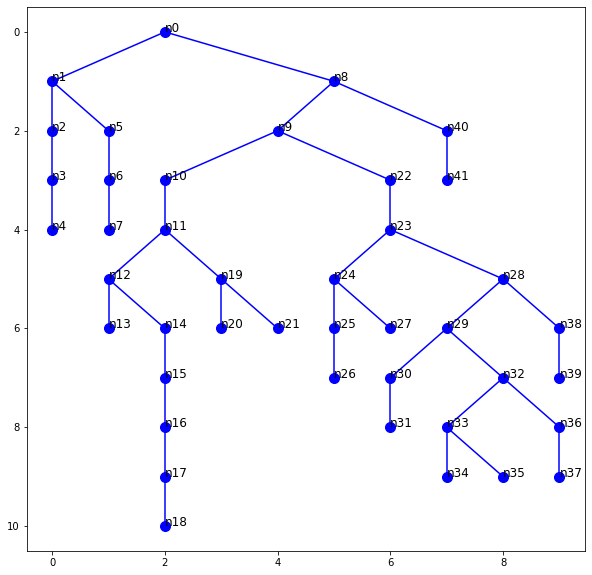

In [178]:
LayeredTreeDraw(graphs[0])
draw_graph(graphs[0])